In [2]:
import os
from collections import Counter #to count the number of classes/labels
import numpy as np #2d numpy arrays
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import load_img
from PIL import Image
from glob import glob
# from google.colab import drive


In [3]:
!wget https://www.dropbox.com/s/fxn3ldztzwxm0rw/FruitsData.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
from pathlib import Path

In [5]:
#Printing all file names under the input directory
for dirname, _, filenames in os.walk('./fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./fruits-360\LICENSE
./fruits-360\readme.md
./fruits-360\papers\fruit_recognition_deep_learning.pdf
./fruits-360\Test\Apple Braeburn\321_100.jpg
./fruits-360\Test\Apple Braeburn\322_100.jpg
./fruits-360\Test\Apple Braeburn\323_100.jpg
./fruits-360\Test\Apple Braeburn\324_100.jpg
./fruits-360\Test\Apple Braeburn\325_100.jpg
./fruits-360\Test\Apple Braeburn\326_100.jpg
./fruits-360\Test\Apple Braeburn\327_100.jpg
./fruits-360\Test\Apple Braeburn\32_100.jpg
./fruits-360\Test\Apple Braeburn\33_100.jpg
./fruits-360\Test\Apple Braeburn\34_100.jpg
./fruits-360\Test\Apple Braeburn\35_100.jpg
./fruits-360\Test\Apple Braeburn\36_100.jpg
./fruits-360\Test\Apple Braeburn\37_100.jpg
./fruits-360\Test\Apple Braeburn\38_100.jpg
./fruits-360\Test\Apple Braeburn\39_100.jpg
./fruits-360\Test\Apple Braeburn\3_100.jpg
./fruits-360\Test\Apple Braeburn\40_100.jpg
./fruits-360\Test\Apple Braeburn\41_100.jpg
./fruits-360\Test\Apple Braeburn\42_100.jpg
./fruits-360\Test\Apple Braeburn\43_100.jpg
./fruits-360\T

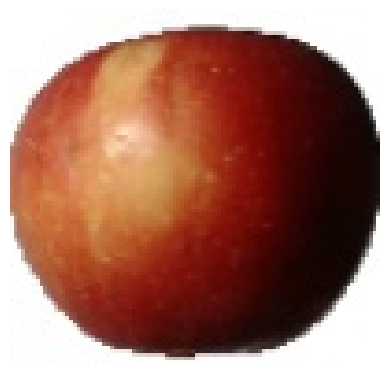

(100, 100, 3)


In [6]:
#Setting Training & Test dir paths
train_path = Path("fruits-360/Training")
test_path = Path("fruits-360/Test")
#Displaying the image
img = load_img(str(train_path) + "/Apple Braeburn/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)

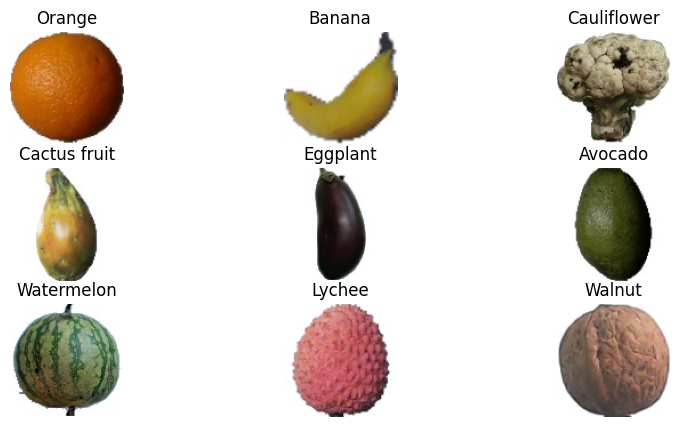

In [7]:
#Visualizing more Images
images = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Watermelon','Lychee', 'Walnut']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(str(train_path) + '/'+ images[i] +"/0_100.jpg", target_size=(100,100)))

In [8]:
#Finding number of classes
className = glob(str(train_path) + '/*')
number_of_class = len(className)
print(number_of_class)

131


In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape)) #Filter size=32, filter_shape = 3x3
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3))) #number of filters= 64
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class)) 
model.add(Activation("softmax"))

#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

#Getting model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [10]:
epochs = 20 #number of iterations
batch_size = 64 #number of samples that are picked at a time

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)
#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [13]:
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

C:\Users\jatin\AppData\Local\Temp\ipykernel_18740\1284404501.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/20
25/25 [==============================] - 6s 201ms/step - loss: 4.8503 - accuracy: 0.0194 - val_loss: 4.6747 - val_accuracy: 0.0221
Epoch 2/20
25/25 [==============================] - 5s 200ms/step - loss: 4.5268 - accuracy: 0.0400 - val_loss: 4.0894 - val_accuracy: 0.0846
Epoch 3/20
25/25 [==============================] - 5s 189ms/step - loss: 3.9870 - accuracy: 0.0750 - val_loss: 3.4466 - val_accuracy: 0.1380
Epoch 4/20
25/25 [==============================] - 5s 189ms/step - loss: 3.5666 - accuracy: 0.1219 - val_loss: 2.9934 - val_accuracy: 0.2344
Epoch 5/20
25/25 [==============================] - 5s 190ms/step - loss: 3.1254 - accuracy: 0.1806 - val_loss: 2.5875 - val_accuracy: 0.2826
Epoch 6/20
25/25 [==============================] - 5s 193ms/step - loss: 2.7541 - accuracy: 0.2531 - val_loss: 2.5700 - val_accuracy: 0.2695
Epoch 7/20
25/25 [==============================] - 5s 186ms/step - loss: 2.4999 - accuracy: 0.3013 - val_loss: 2.0600 - val_accuracy: 0.4115
Epoch 

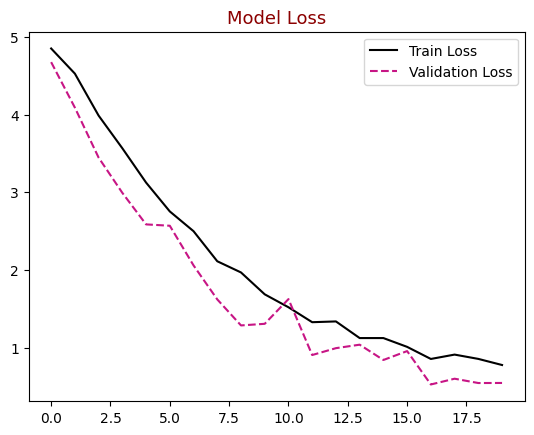

In [14]:
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

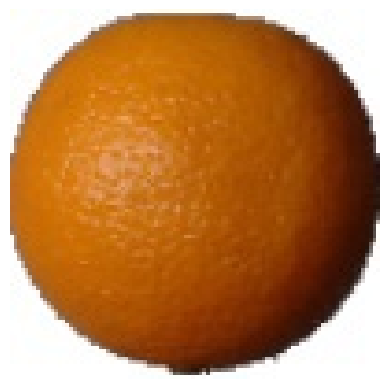

In [15]:
img = load_img(str(test_path) + "/Orange/77_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Loading the image 
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load(str(test_path) + "/Orange/77_100.jpg")

In [16]:
prediction = (np.argmax(model.predict(image), axis=-1))
print(prediction)

1/1 [==============================] - 0s 69ms/step
[77]


In [17]:
#Printing class dictionary
print(test_generator.class_indices)

{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui